In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/My Drive/osteoporosis.csv')

In [4]:
print(data)

           Id  Age  Gender Hormonal Changes Family History    Race/Ethnicity  \
0     1734616   69  Female           Normal            Yes             Asian   
1     1419098   32  Female           Normal            Yes             Asian   
2     1797916   89  Female   Postmenopausal             No         Caucasian   
3     1805337   78  Female           Normal             No         Caucasian   
4     1351334   38    Male   Postmenopausal            Yes  African American   
...       ...  ...     ...              ...            ...               ...   
1953  1991635   19  Female           Normal            Yes  African American   
1954  1528601   23  Female   Postmenopausal            Yes         Caucasian   
1955  1990957   34  Female   Postmenopausal             No  African American   
1956  1779848   25    Male   Postmenopausal             No  African American   
1957  1282963   26  Female   Postmenopausal             No  African American   

      Body Weight Calcium Intake Vitami

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

In [6]:
print(data.info())  # Summary of the dataset including column data types and missing values
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

In [7]:
#understanding the data set
print("data set length:", len(data))
print("Data Set shape:", data.shape)

data set length: 1958
Data Set shape: (1958, 16)


In [8]:
print("Dataset Info:")
print(data.info())
print("\nDataset Head:")
print(data.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int6

In [9]:
from sklearn.impute import SimpleImputer

# Check for missing values before imputation
print("Missing Values Before Imputation:")
print(data.isnull().sum())

# Define numerical and categorical columns
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object']).columns

# Initialize imputers for numerical and categorical features
numeric_imputer = SimpleImputer(strategy='mean')  # Replace missing numeric values with mean
categorical_imputer = SimpleImputer(strategy='most_frequent')  # Replace missing categorical values with the most frequent value

# Apply imputers
data[numeric_features] = numeric_imputer.fit_transform(data[numeric_features])
data[categorical_features] = categorical_imputer.fit_transform(data[categorical_features])

# Check for missing values after imputation
print("\nMissing Values After Imputation:")
print(data.isnull().sum())


Missing Values Before Imputation:
Id                       0
Age                      0
Gender                   0
Hormonal Changes         0
Family History           0
Race/Ethnicity           0
Body Weight              0
Calcium Intake           0
Vitamin D Intake         0
Physical Activity        0
Smoking                  0
Alcohol Consumption    988
Medical Conditions     647
Medications            985
Prior Fractures          0
Osteoporosis             0
dtype: int64

Missing Values After Imputation:
Id                     0
Age                    0
Gender                 0
Hormonal Changes       0
Family History         0
Race/Ethnicity         0
Body Weight            0
Calcium Intake         0
Vitamin D Intake       0
Physical Activity      0
Smoking                0
Alcohol Consumption    0
Medical Conditions     0
Medications            0
Prior Fractures        0
Osteoporosis           0
dtype: int64


In [10]:

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import joblib


In [11]:
# Define features and target variable
X = data.drop(columns=['Id', 'Osteoporosis'])  # Exclude unnecessary and target columns
y = data['Osteoporosis']

# Identify categorical and numerical columns
numeric_features = ['Age']
categorical_features = X.select_dtypes(include=['object']).columns.tolist()



In [12]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

In [13]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])



In [14]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
preprocessor = ColumnTransformer( transformers=[ ('num', numeric_transformer, numeric_features),('cat', categorical_transformer, categorical_features)])


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [16]:
print(data.dtypes)


Id                     float64
Age                    float64
Gender                  object
Hormonal Changes        object
Family History          object
Race/Ethnicity          object
Body Weight             object
Calcium Intake          object
Vitamin D Intake        object
Physical Activity       object
Smoking                 object
Alcohol Consumption     object
Medical Conditions      object
Medications             object
Prior Fractures         object
Osteoporosis           float64
dtype: object


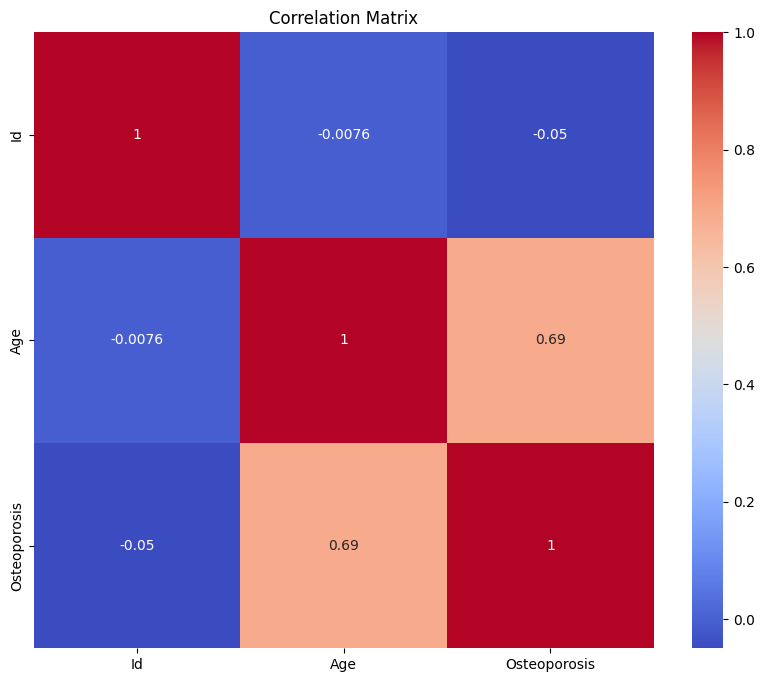

In [17]:
numeric_data = data.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


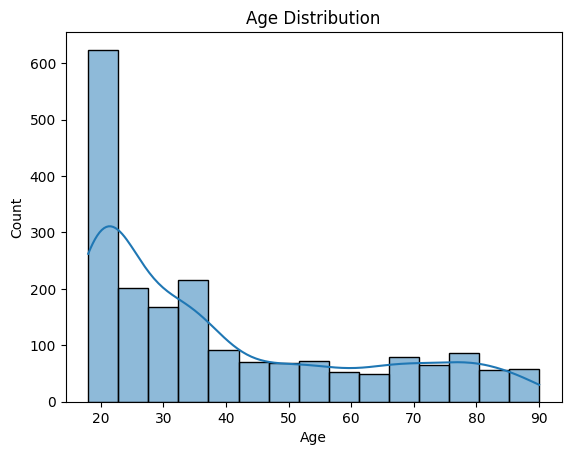

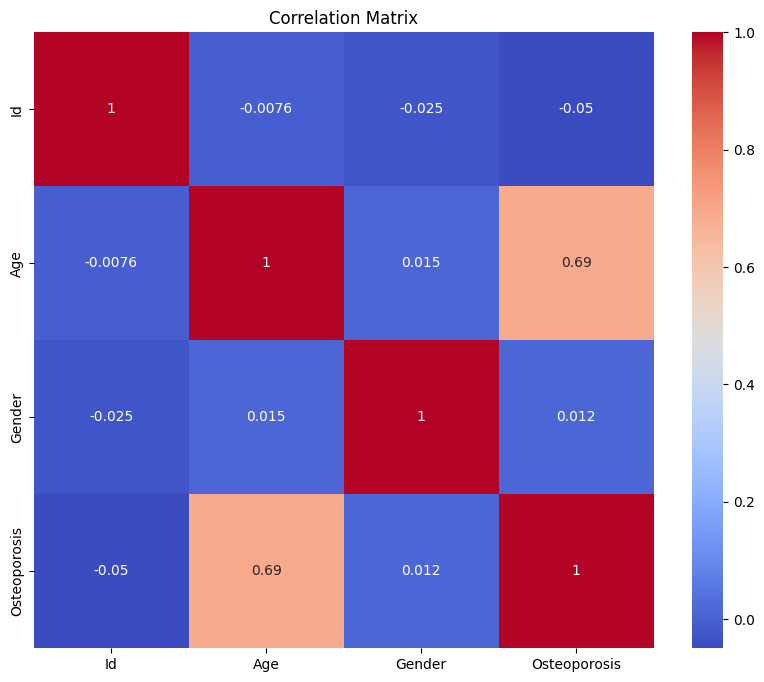

In [18]:
data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})
# Histogram for Age
sns.histplot(data['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

# Correlation heatmap (numerical features only)
numeric_data = data.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [19]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(probability=True, random_state=42)}

# Train and evaluate models
print("\nModel Evaluation Results:")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    print(f"\n{name}")
    print(classification_report(y_test, y_pred))
    if y_proba is not None:
        print(f"AUC-ROC: {roc_auc_score(y_test, y_proba):.2f}")



Model Evaluation Results:

Logistic Regression
              precision    recall  f1-score   support

         0.0       0.78      0.84      0.81       193
         1.0       0.83      0.77      0.80       199

    accuracy                           0.80       392
   macro avg       0.81      0.80      0.80       392
weighted avg       0.81      0.80      0.80       392

AUC-ROC: 0.89

Random Forest
              precision    recall  f1-score   support

         0.0       0.78      0.91      0.84       193
         1.0       0.89      0.75      0.82       199

    accuracy                           0.83       392
   macro avg       0.84      0.83      0.83       392
weighted avg       0.84      0.83      0.83       392

AUC-ROC: 0.88

SVM
              precision    recall  f1-score   support

         0.0       0.77      0.89      0.82       193
         1.0       0.88      0.74      0.80       199

    accuracy                           0.81       392
   macro avg       0.82      0.8

In [20]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}



Final Model Evaluation Metrics:
Accuracy: 0.84
Precision: 0.94
Recall: 0.73
F1 Score: 0.82
AUC-ROC: 0.88


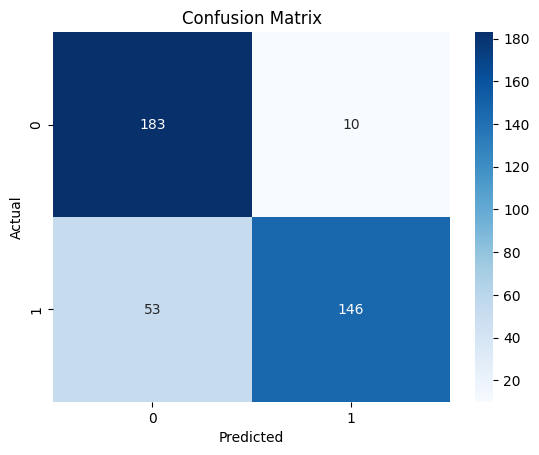

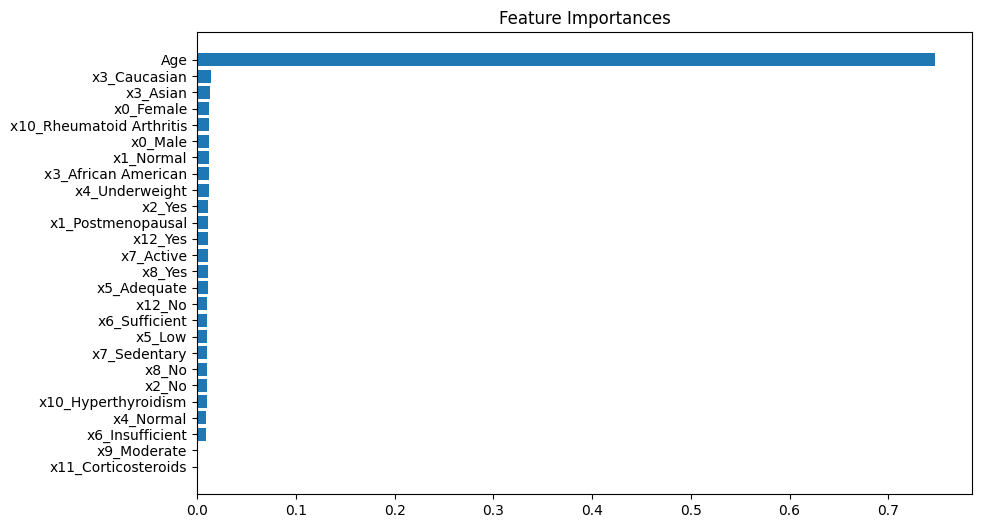

In [21]:
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Display metrics
print("\nFinal Model Evaluation Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba):.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance (for Random Forest)
importances = best_model.feature_importances_
feature_names = numeric_features + preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out().tolist()
sorted_idx = importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.title("Feature Importances")
plt.show()


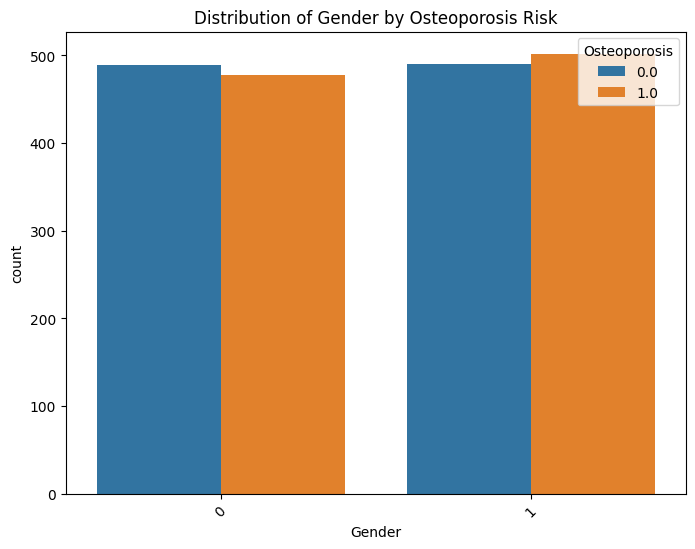

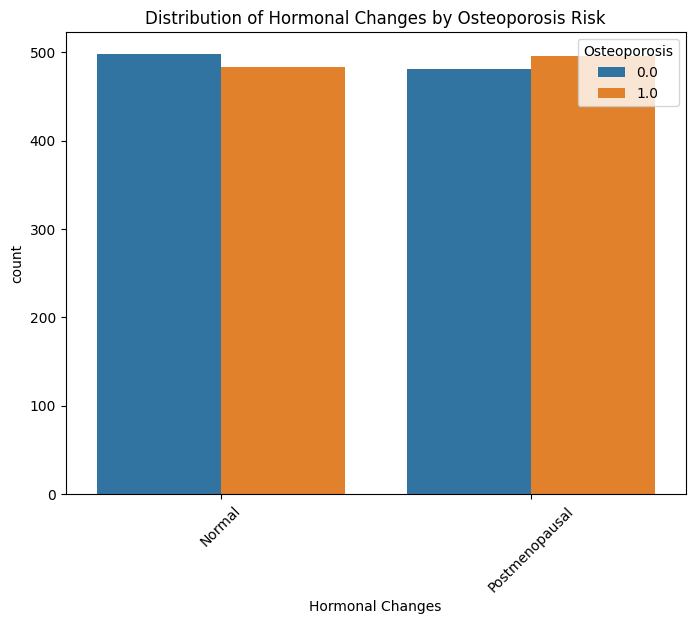

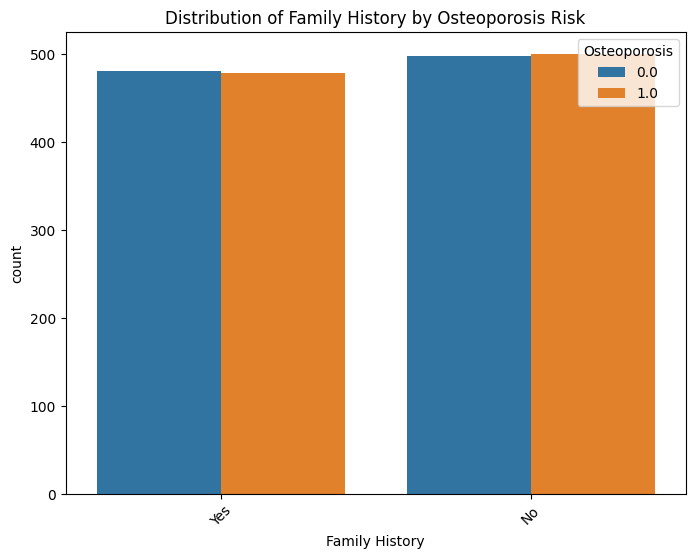

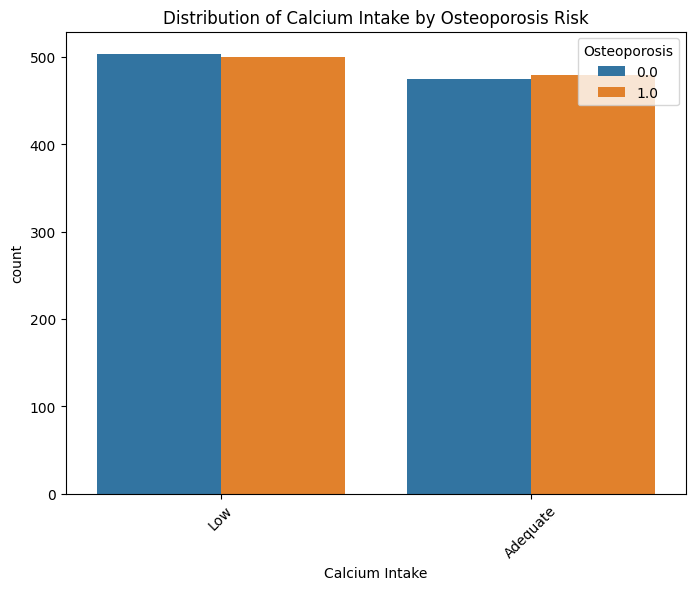

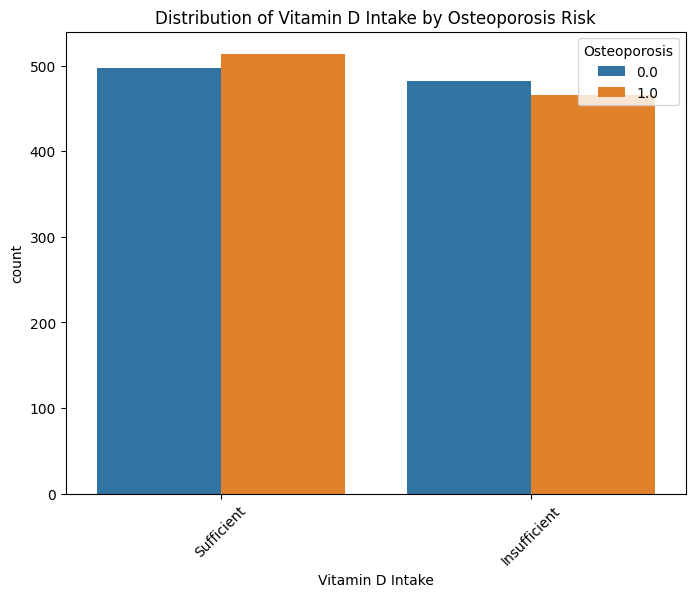

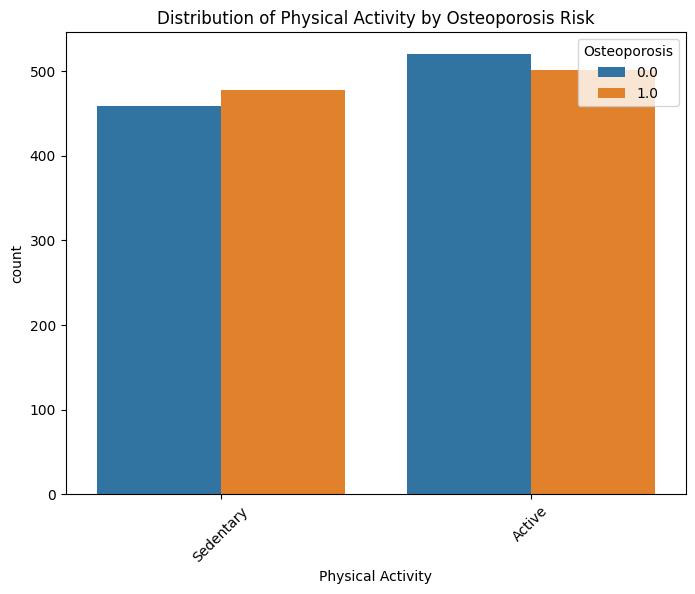

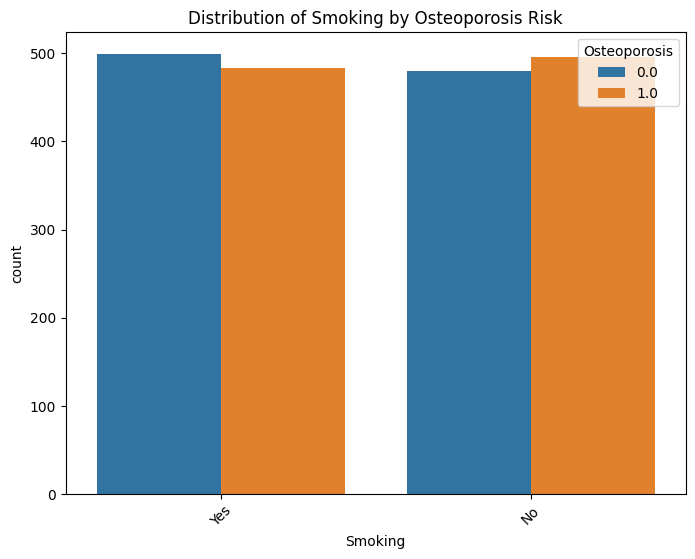

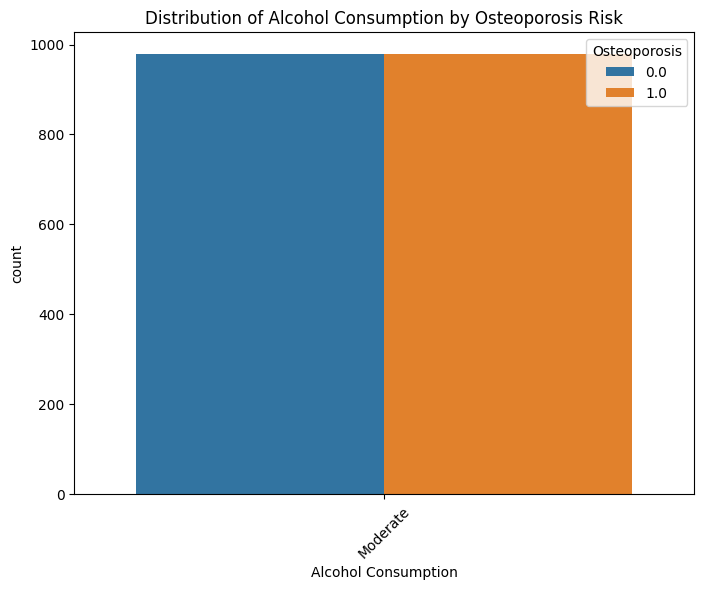

In [22]:
# Count plot for categorical variables
categorical_cols = ['Gender', 'Hormonal Changes', 'Family History', 'Calcium Intake',
                    'Vitamin D Intake', 'Physical Activity', 'Smoking', 'Alcohol Consumption']
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue='Osteoporosis', data=data)
    plt.title(f"Distribution of {col} by Osteoporosis Risk")
    plt.xticks(rotation=45)
    plt.show()


In [23]:
from sklearn.model_selection import cross_validate

# Evaluate Random Forest with multiple metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

cv_results = cross_validate(rf_model, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)
for metric in scoring:
    print(f"Mean {metric}: {np.mean(cv_results['test_' + metric]):.2f}")


Mean accuracy: 0.84
Mean precision: 0.91
Mean recall: 0.76
Mean f1: 0.83


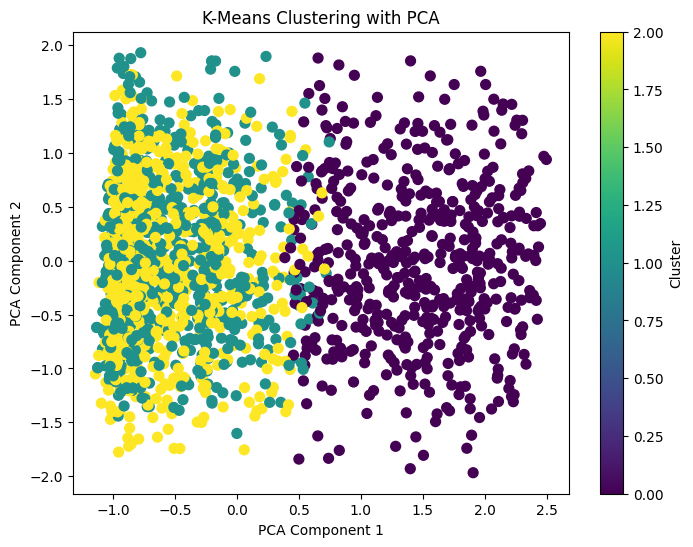

In [24]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Selecting features for clustering
X_cluster = data.drop(columns=['Id', 'Osteoporosis'])

# Preprocess the data
X_cluster_preprocessed = preprocessor.fit_transform(X_cluster)

# Perform K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_cluster_preprocessed)

# Add cluster labels to the dataset
data['Cluster'] = clusters

# Visualize clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_cluster_preprocessed)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('K-Means Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


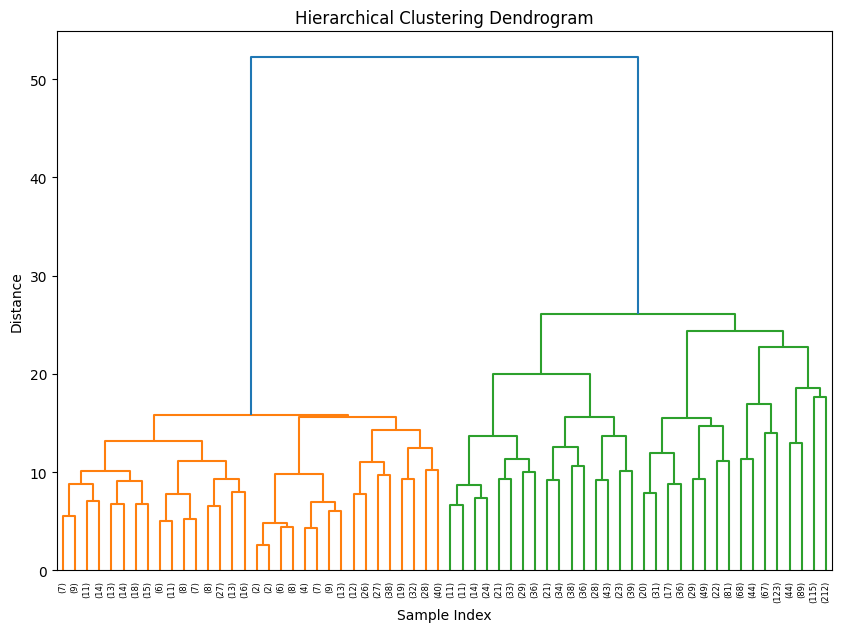

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Perform hierarchical clustering
linkage_matrix = linkage(X_cluster_preprocessed, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3)
hierarchical_clusters = agg_cluster.fit_predict(X_cluster_preprocessed)
data['Hierarchical_Cluster'] = hierarchical_clusters


In [26]:
import shap

# Combine numeric and categorical feature names after preprocessing
feature_names = numeric_features + preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features).tolist()

# Convert preprocessed X_test back to DataFrame with feature names
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# Initialize SHAP explainer for the Random Forest model
explainer = shap.TreeExplainer(best_model)

# Generate SHAP values for the preprocessed test set
shap_values = explainer.shap_values(X_test)


In [27]:
# Check alignment of data and feature names
print("SHAP Values Shape:", shap_values[1].shape)
print("X_test_df Shape:", X_test_df.shape)
print("Feature Names Length:", len(feature_names))



SHAP Values Shape: (26, 2)
X_test_df Shape: (392, 26)
Feature Names Length: 26


In [28]:
def predict_osteoporosis(model, preprocessor, input_data):
    """
    Predict osteoporosis risk for a given input data.

    Parameters:
    model: Trained model
    preprocessor: Preprocessing pipeline
    input_data: DataFrame with input features

    Returns:
    Prediction and risk score
    """
    processed_data = preprocessor.transform(input_data)
    prediction = model.predict(processed_data)
    risk_score = model.predict_proba(processed_data)[:, 1]
    return prediction[0], risk_score[0]

# Example usage
example_input = pd.DataFrame([{
    "Age": 60,
    "Gender": "Male",
    "Hormonal Changes": "Normal",
    "Family History": "No",
    "Race/Ethnicity": "Caucasian",
    "Body Weight": "Normal",
    "Calcium Intake": "Adequate",
    "Vitamin D Intake": "Sufficient",
    "Physical Activity": "Active",
    "Smoking": "No",
    "Alcohol Consumption": "None",
    "Medical Conditions": "None",
    "Medications": "None",
    "Prior Fractures": "No"
}])

pred, score = predict_osteoporosis(best_model, preprocessor, example_input)
print(f"Predicted Risk: {pred}, Risk Score: {score:.2f}")


Predicted Risk: 1.0, Risk Score: 0.85


In [29]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Define features and target
X = data.drop(columns=['Id', 'Osteoporosis'])
y = data['Osteoporosis']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Train and evaluate models using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name}: Mean Accuracy = {scores.mean():.2f}")


Random Forest: Mean Accuracy = 0.84
Gradient Boosting: Mean Accuracy = 0.91


In [30]:
from scipy.stats import chi2_contingency

# Chi-Square Test
def perform_chi_square(X, y):
    chi2_results = {}
    for column in X.select_dtypes(include=['object', 'category']).columns:
        contingency_table = pd.crosstab(X[column], y)
        chi2, p, _, _ = chi2_contingency(contingency_table)
        chi2_results[column] = p
    return chi2_results


In [31]:
from scipy.stats import ttest_ind

# T-Test
def perform_t_test(X, y):
    ttest_results = {}
    for column in X.select_dtypes(include=['float64', 'int64']).columns:
        group_0 = X[y == 0][column]
        group_1 = X[y == 1][column]
        t_stat, p = ttest_ind(group_0, group_1, nan_policy='omit')
        ttest_results[column] = p
    return ttest_results


In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Naive Bayes Model
def naive_bayes_model(X_train, X_test, y_train, y_test):
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    y_pred = nb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Train Deep Learning Model
def deep_learning_model(X_train, X_test, y_train, y_test):
    model = Sequential([
        Dense(64, activation='relu', input_dim=X_train.shape[1]),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Data preparation
X = data.drop(columns=['Id', 'Osteoporosis'])
y = data['Osteoporosis']

# Encode categorical features
le = LabelEncoder()
for col in X.select_dtypes(include=['object', 'category']).columns:
    X[col] = le.fit_transform(X[col])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

chi2_results = perform_chi_square(X, y)
ttest_results = perform_t_test(X, y)
nb_accuracy = naive_bayes_model(X_train, X_test, y_train, y_test)
dl_accuracy = deep_learning_model(X_train, X_test, y_train, y_test)


# Results
print("Chi-Square P-Values:", chi2_results)
print("T-Test P-Values:", ttest_results)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Deep Learning Accuracy:", dl_accuracy)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
Chi-Square P-Values: {}
T-Test P-Values: {'Age': 2.83393260377111e-278, 'Gender': 0.5877473196172496, 'Hormonal Changes': 0.498034760964183, 'Family History': 0.9280040754628724, 'Race/Ethnicity': 0.7627684910572969, 'Body Weight': 0.11334241233427242, 'Calcium Intake': 0.8565731628340228, 'Vitamin D Intake': 0.4422782738629637, 'Physical Activity': 0.3902885001389875, 'Smoking': 0.4698241322427654, 'Alcohol Consumption': nan, 'Medical Conditions': 0.8848232357652643, 'Medications': nan, 'Prior Fractures': 0.4980320703646277, 'Hierarchical_Cluster': 5.063278639173994e-09}
Naive Bayes Accuracy: 0.8367346938775511
Deep Learning Accuracy: 0.8163265306122449
